## Trotter project

### ハミルトニアン基底エネルギーの計算

In [3]:
import trotter_error_plt as tep
import numpy as np

Hchain = 14 # H-chain の原子数
jw_hamiltonian, E, ham_name, num_qubits = tep.jw_hamiltonian_maker(Hchain)
print(E)
print(f'Et = -π/4 を満たす t = {- np.pi / (4 * E) }')
print(f'Et = -3π/4 を満たす t = {- np.pi*3 / (4 * E) }')

H14_sto-3g_singlet_distance_100_charge_0
-7.294620477820182
Et = -π/4 を満たす t = 0.10766813239777284
Et = -3π/4 を満たす t = 0.3230043971933185


### Error plt

#### t の値：
Et = ± $\pi$ / 2 となるような t は避ける。経験的に、小数点1桁離せばほぼ直線となる。目安として Et  $\sim n * \pi$ / 4 となるような t を選んだ。  
高次の積公式では、Et  $\sim \pi$ / 4 だと、誤差がマシンイプシロンに引っかかるため、 Et  $\sim 2 * \pi$ / 4 などに調整。  
ステップ幅は t の 0.1 % 程度。


#### 積公式の種類表記(num_w)：
2nd:2次,  
4th:4次,  
8th(Yoshida):Yoshidaの8次,  
8th(Morales):Moralesらの8次(m=8),  
10th(Morales):Moralesらの10次(m=16),  
4th(new_2):新構築4次(係数2個),  
4th(new_3):新構築3次(係数3個) 


#### フィッティング結果：
ディレクトリ : "trotter_expo_coeff_gr" に保存される。保存されるのは、誤差 $\alpha t^p$ のスケーリングを、$\alpha, p$ の両方で行ったもの、と $p$ を次数で固定し、$\alpha$ だけでスケーリングしたもの。  
保存名は、"｛ハミルトニアンの情報｝＿｛num_w｝＿｛$p$ を固定しているのであれば ave｝"  
ハミルトニアン:H3, 使用積公式:4次, $p$ の固定ありの場合の保存名例:  
H3_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_4th_ave

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846221
error exponent :[2.7934465]
error coefficient :[3.15247877e-05]
r^2 (log-log): 0.999951818260274
average_coeff:2.5491862854577444e-05


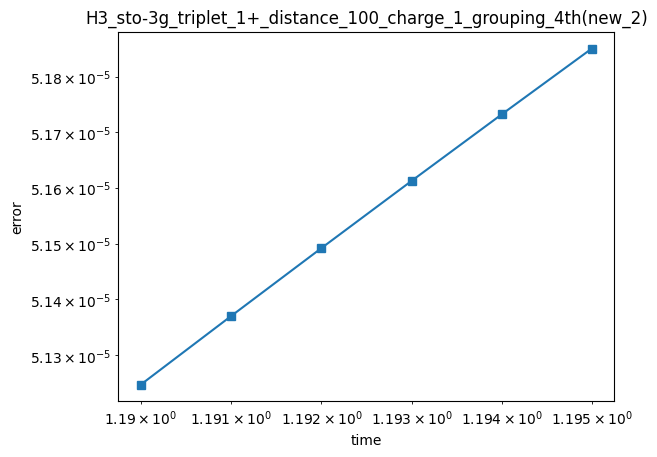

In [ ]:
import trotter_error_plt as tep
s_time = 1.19 # 初時刻
e_time = 1.195 # 終時刻
dividing = 0.001 # ステップ幅
Hchain = 3 # H-chain
num_w = '4th(new_2)' # 使用積公式
storage = None # フィッティング α, p 保存可否
avestrage = None # フィッティング α (p 固定) 保存可否
tep.trotter_error_plt_qc_gr(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

### 摂動論による基底エネルギーの推定誤差(直接対角化との比較)

converged SCF energy = -1.06610864931794
[[ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [-1.75308242e-01+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 2.77555756e-17+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [-5.56327820e-17+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 9.84513596e-01+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j]]
H2_sto-3g_singlet_distance_100_charge_0
[[ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.75301440e-01+1.54431121e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 3.91762126e-17-3.93282631e-17j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.02913583e-16+6.39844527e-17j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 9.84475396e-01-8.67266496e-03j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000

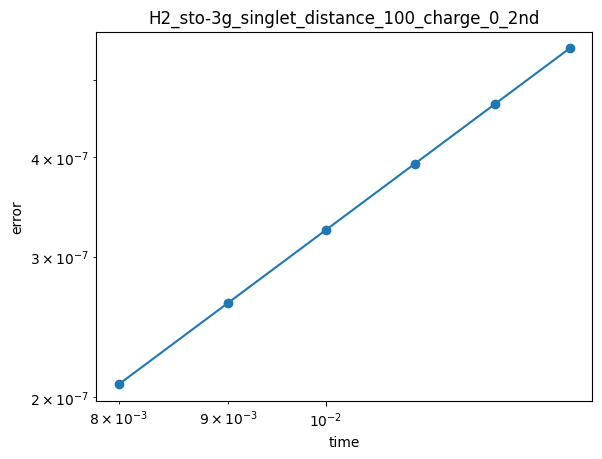

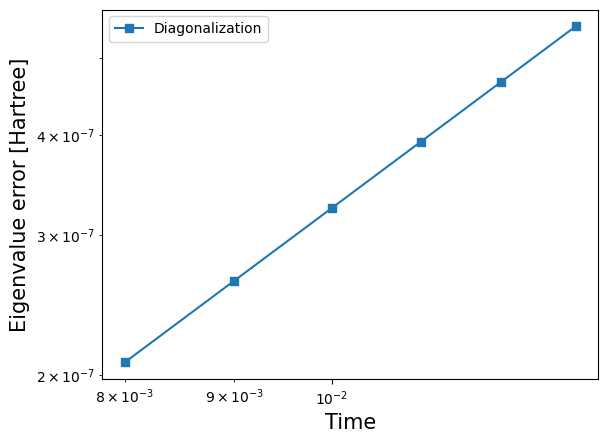

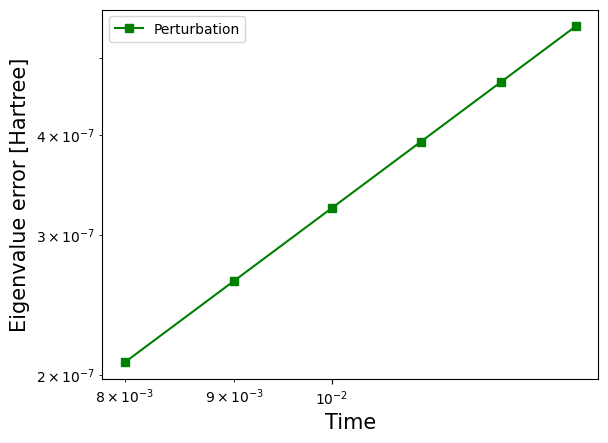

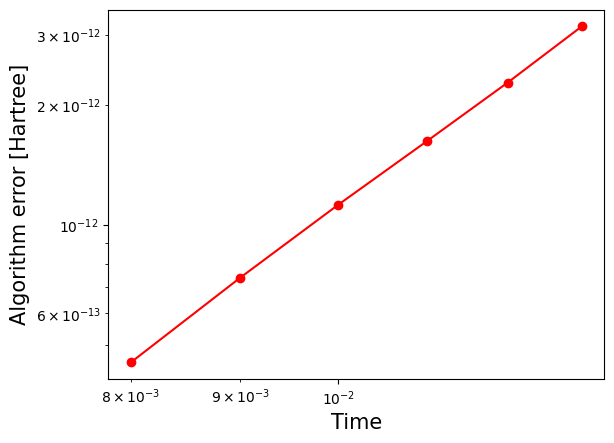

/home/abe/myproject/Evaluation_numGate_highorder/trotter_error_plt.py:892: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


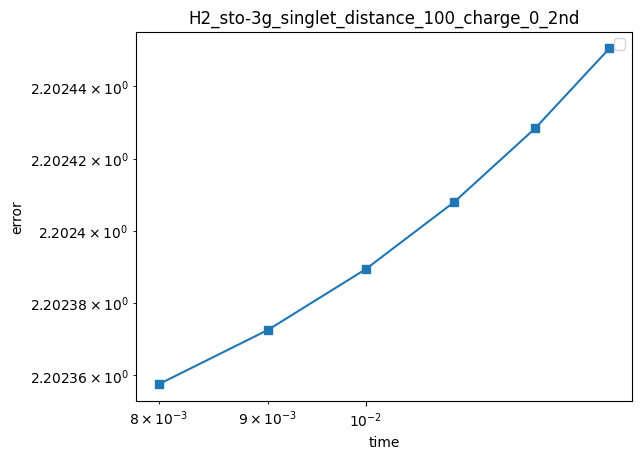

In [1]:
import trotter_error_plt as tep
s_time = 0.008 # 初時刻
e_time = 0.014 # 終時刻
dividing = 0.001 # ステップ幅
Hchain = 2 # H-chain
num_w = '2nd' # 使用積公式
storage = None # フィッティング α, p 保存可否
avestrage = None # フィッティング α (p 固定) 保存可否
tep.trotter_error_plt_qc(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

### extrapolation
H-chain の総計算量をプロットして、そのプロットを使って、外挿を行う。  
ディレクトリ "trotter_expo_coeff_gr" のスケーリング結果の $\alpha, p$ から総計算量を決定し、それに対して外挿する。  
そのため、変数 Hchain の原子数において上の Error plt でフィッティングを行っている必要がある。

H2_sto-3g_singlet_distance_100_charge_0
H3_sto-3g_triplet_1+_distance_100_charge_1
H4_sto-3g_singlet_distance_100_charge_0
H5_sto-3g_triplet_1+_distance_100_charge_1
H6_sto-3g_singlet_distance_100_charge_0
H7_sto-3g_triplet_1+_distance_100_charge_1
H8_sto-3g_singlet_distance_100_charge_0
H9_sto-3g_triplet_1+_distance_100_charge_1


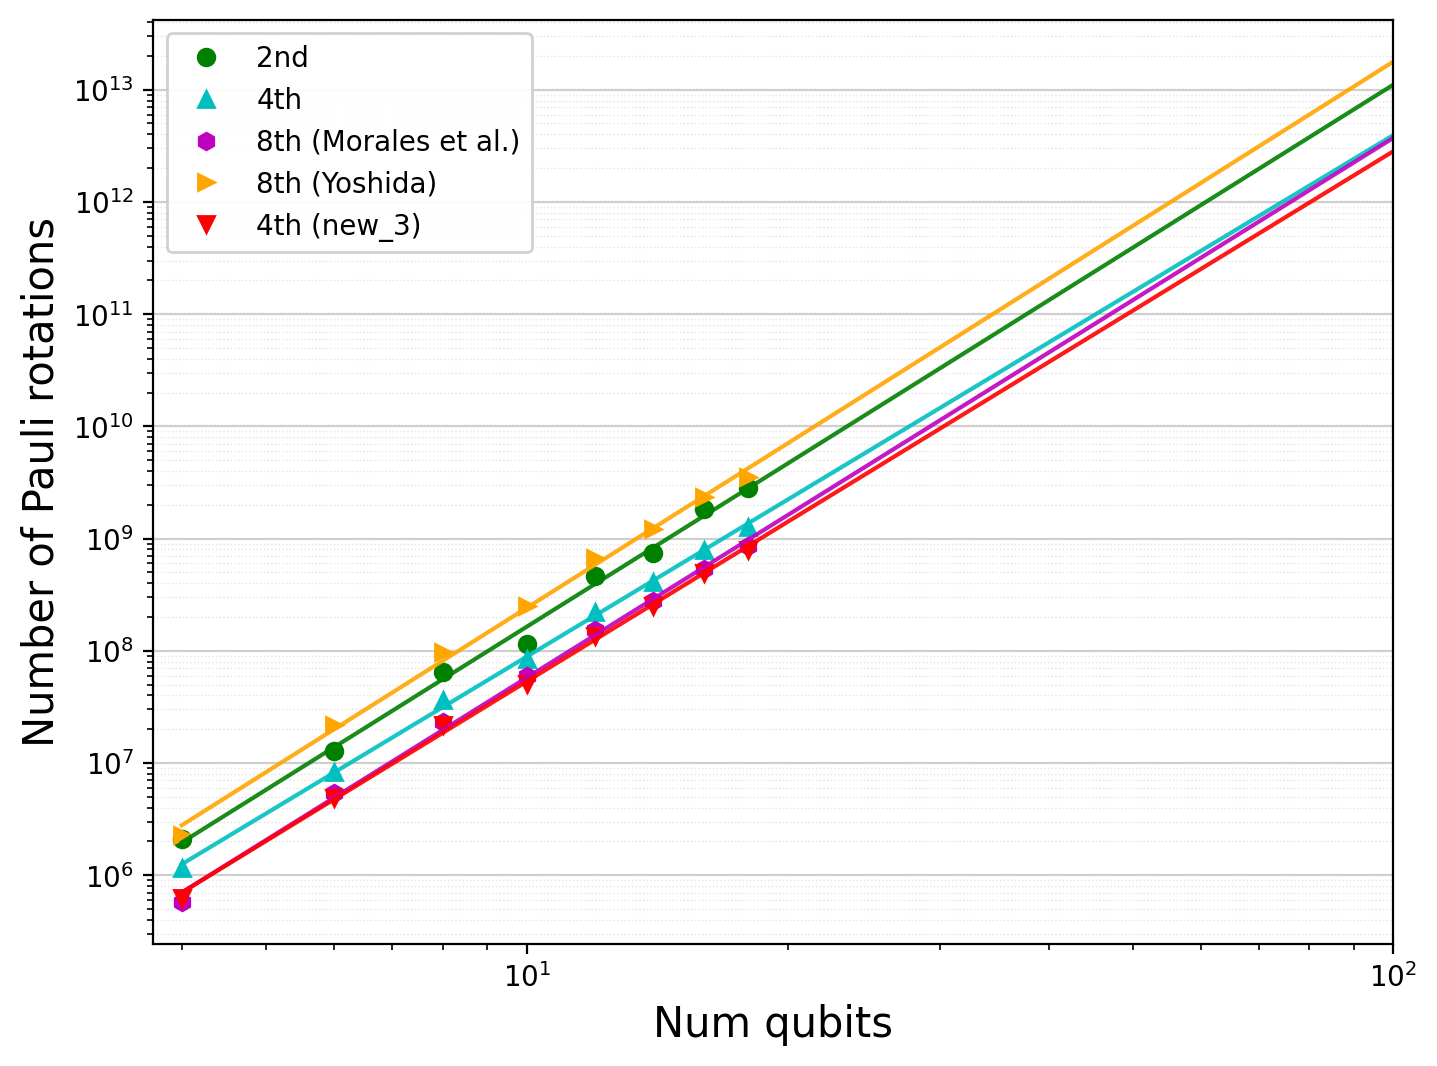

In [ ]:
import trotter_error_plt as tep
Hchain = 9 # プロットを行う H-chain の原子数。上の Error plt でスケーリング済みの必要あり。
n_w_list = ['2nd', '4th', '8th(Morales)', '8th(Yoshida)', '4th(new_3)'] # 比較するPF
tep.exp_extrapolation(Hchain, n_w_list, show_bands=None) # show_bands: 外挿の最小Fとなる PF の色帯をプロット下部に表示 

### 積公式構築
$t^k$ までのテイラー展開で数値最適化を行い積公式のパラメータ[$w_1,...w_m$]を決定。残差が threshold より小さくなるパラメータを n_targets 個集めてその中で最も残差が小さいものを返す

In [ ]:
import optimal_trotter

best_w, best_total = optimal_trotter.parallel_find(m=2, k=4, n_targets=10, threshold=1e-17)
print(f"最良の optimalw: {best_w}")
print(f"対応する total: {best_total}") # 残差

最良の optimalw: [0.59499367 0.2943892 ]
対応する total: 1.0164395367051604e-18


#### 残差比較

In [ ]:
import numpy as np
import optimal_trotter

cand_search_best = {
    "name": "search_best",
    "w_free": [0.42008729, 0.40899193]
}

cand_known = {
    "name": "known_formula",
    "w_free": [0.29534665, 0.59302617]
}


results = optimal_trotter.compare_residuals(
    formulas=[cand_search_best, cand_known],
    k=5,
    sort_by="l2"   # L1ノルム(総誤差)が小さい順に並べる
)

for r in results:
    print("----", r["name"], "----")
    print("  L1 sum  :", r["l1"])
    print("  L2 norm :", r["l2"])
    print("  Linf max:", r["linf"])
    print("  w_free  :", r["w_free"])
    # 必要なら r["rest_vec"] (np.longdoubleでの項別のズレ) も見れる


---- search_best ----
  L1 sum  : 0.039866335337528945
  L2 norm : 0.008970465504813528
  Linf max: 0.004442794159854848
  w_free  : [0.42008729 0.40899193]
---- known_formula ----
  L1 sum  : 0.05445272786621607
  L2 norm : 0.012580145070478667
  Linf max: 0.0067086293029674
  w_free  : [0.29534665 0.59302617]
